# The purpose of this notebook is to learn to save a .fits file.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
#import fitsio 
from astropy.io import fits
from astropy.table import Table,Column
from glob import glob
%matplotlib inline

In [2]:
wavemr,fluxmr=np.loadtxt('mock_2.6_z_2.8.dat',skiprows=2,unpack=True) # data of mock of Rodrigo's
wavedr,fluxdr=np.loadtxt('boss_2.6<z<2.8.dat',skiprows=2,unpack=True) # data of boss data of Rodrigo's
wavemh,fluxmh=np.loadtxt('Mock.dat',skiprows=2,unpack=True)           # data of mock of Hélion's
wavedh,fluxdh=np.loadtxt('Data.dat',skiprows=2,unpack=True)           # data of boss data of Hélion's 
stdmockr = np.loadtxt('std_mock_2.6_z_2.8.dat',skiprows=1,unpack=True) # data of standar desviation of mock of Rodrigo's
stddatar = np.loadtxt('std_boss_2.6<z<2.8.dat',skiprows=1,unpack=True)

In [3]:
wavemr2,fluxmr2=np.loadtxt('mock_2.2_z_2.4.dat',skiprows=2,unpack=True)
wavemr3,fluxmr3=np.loadtxt('mock_3.0_z_3.2.dat',skiprows=2,unpack=True)
wavemr4,fluxmr4=np.loadtxt('mock_3.4_z_3.6.dat',skiprows=2,unpack=True)

This is a way to write a .fits file, but is not so good

In [4]:
header = fits.Header()
header['primero'] = (wavemr2[0],'wavelength 2.2 - 2.4')
header['segundo'] = (wavemr[0],'wavelength 2.6 - 2.8')

hdus = fits.HDUList()
hdus.append(fits.PrimaryHDU(fluxmr2, header=header))
hdus.append(fits.ImageHDU(fluxmr, header=header, name = 'Flujo 2.6 - 2.8'))

hdus.writeto('stacks.fits', overwrite=True)

This way is wonderful for save a .fits file

In [114]:
columnas_wave = [('wavelength 2.2 - 2.4', 'f8'), ('wavelength 2.6 - 2.8  (712,)', 'f8'), ('wavelength 3.0 - 3.2  (636,)', 'f8'), ('wavelength 3.4 - 3.6  (574,)', 'f8')]
waves = Table(np.zeros(len(wavemr2),dtype=columnas_wave))
waves['wavelength 2.2 - 2.4'][:] = wavemr2
waves['wavelength 2.6 - 2.8  (712,)'][:712] = wavemr
waves['wavelength 3.0 - 3.2  (636,)'][:636] = wavemr3
waves['wavelength 3.4 - 3.6  (574,)'][:574] = wavemr4

columnas_flux = [('flux 2.2 - 2.4', 'f8'), ('flux 2.6 - 2.8  (712,)', 'f8'), ('flux 3.0 - 3.2  (636,)', 'f8'), ('flux 3.4 - 3.6  (574,)', 'f8')]
fluxs = Table(np.zeros(len(fluxmr2),dtype=columnas_flux))
fluxs['flux 2.2 - 2.4'][:] = fluxmr2
fluxs['flux 2.6 - 2.8  (712,)'][:712] = fluxmr
fluxs['flux 3.0 - 3.2  (636,)'][:636] = fluxmr3
fluxs['flux 3.4 - 3.6  (574,)'][:574] = fluxmr4

columnas_std = [('standard deviation 2.4-2.6 mock', 'f8'), ('standard deviation 2.4-2.6 data (667,)', 'f8')]
std = Table(np.zeros(len(stdmockr),dtype=columnas_std))
std['standard deviation 2.4-2.6 mock'][:] = stdmockr
std['standard deviation 2.4-2.6 data (667,)'][:667] = stddatar

hwaves = fits.convenience.table_to_hdu(waves); hwaves.name='WAVELENGTHS'
hfluxs = fits.convenience.table_to_hdu(fluxs); hfluxs.name='Fluxs'
hstd = fits.convenience.table_to_hdu(std); hstd.name='standard deviation'
hdulist = fits.HDUList([fits.PrimaryHDU(),hwaves,hfluxs,hstd])
hdulist.writeto('stacks2.fits', overwrite=True)

In [115]:
import fitsio
fdir = '/home/rodrigo/Documentos/maestria/ultimo_año/programas/stacking/stacks2.fits'
DM = fitsio.FITS(fdir)
DM


  file: /home/rodrigo/Documentos/maestria/ultimo_año/programas/stacking/stacks2.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      WAVELENGTHS
  2      BINARY_TBL      FLUXS
  3      BINARY_TBL      STANDARD DEVIATION

In [117]:
wm = fitsio.read(fdir,'wavelengths')
wm.dtype.descr

[('wavelength 2.2 - 2.4', '>f8'),
 ('wavelength 2.6 - 2.8  (712,)', '>f8'),
 ('wavelength 3.0 - 3.2  (636,)', '>f8'),
 ('wavelength 3.4 - 3.6  (574,)', '>f8')]

In [118]:
fm = fitsio.read(fdir,'fluxs')
fm.dtype.descr

[('flux 2.2 - 2.4', '>f8'),
 ('flux 2.6 - 2.8  (712,)', '>f8'),
 ('flux 3.0 - 3.2  (636,)', '>f8'),
 ('flux 3.4 - 3.6  (574,)', '>f8')]

In [121]:
sm = fitsio.read(fdir,'standard deviation')
sm.dtype.descr

[('standard deviation 2.4-2.6 mock', '>f8'),
 ('standard deviation 2.4-2.6 data (667,)', '>f8')]

Text(0,0.5,'Flux')

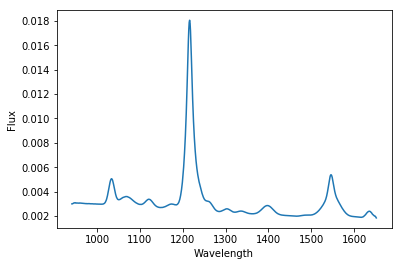

In [125]:
plt.plot(wm['wavelength 2.6 - 2.8  (712,)'][:712],fm['flux 2.6 - 2.8  (712,)'][:712])
plt.xlabel('Wavelength')
plt.ylabel('Flux')